# Delineamento Inteiramente Casualizado - DIC
Aula 02 - Exemplo 02

__OBJETIVO__

Demonstrar como realizar as principais atividades da etapa **análise dos dados** de um experimento. No exemplo abaixo, serão demonstradas diferentes estratégias de como visualizar medidas descritivas dos dados (média, mediana, variância, histograma, etc), como fazer a ANOVA e a inspeção dos resíduos.

## Etapa: Coleta dos Dados

Nessa etapa você deve carregar os resultados do experimento armazenados em um arquivo externo ao *script* (DIC_02.txt) criado anteriormente. O carregamento é realizado a partir da função **read.table** (link: ...). Abaixo, os dados carregados via comando **read.table** são armazenados na variável **dados**.

Uma variável é a forma como as linguagens de programação permitem que o usuário possa armazenar e acessar dados da memória do computador. No passo abaixo, o arquivo *DIC_02.txt* é carregado para a memória do computador e poderá ser acessado toda vez que a variável **dados** for chamada.

In [1]:
dados = read.table("DIC_02.txt",h=T)
dados

TRAT,REP,PESO
<chr>,<int>,<int>
A,1,54
A,2,40
A,3,51
A,4,36
A,5,50
A,6,48
B,1,60
B,2,55
B,3,66


### Estatística Descritiva

Os comandos abaixo representam formas de visualizar os dados e servem para que o pesquisador possa conhecer mais acerca de como os resultados do experimento se apresentam.

A função **str** exibe os valores armazenados em cada coluna do arquivo **DIC_02.txt** que foi carregado anteriormente e armazenado na variável **dados**.

In [2]:
str(dados)

'data.frame':	24 obs. of  3 variables:
 $ TRAT: chr  "A" "A" "A" "A" ...
 $ REP : int  1 2 3 4 5 6 1 2 3 4 ...
 $ PESO: int  54 40 51 36 50 48 60 55 66 61 ...


A função **summary** apresenta um sumário com as informações de **Valor Mínimo**, **1° Quartil**, **Mediana**, **Média**, **3° Quartil** e **Valor Máximo** referentes aos efeitos (coluna **PESO**) dos tratamentos. Essa é uma representação considerando todos os pesos coletados, sem nenhuma espécie de filtro.

In [3]:
summary(dados$PESO)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   44.00   49.50   50.12   59.25   66.00 

A comando abaixo (**by**) funciona de forma similar ao **summary**, porém apresenta as informações referentes aos efeitos (coluna **PESO**) de forma agrupada para cada tratamento (coluna **TRAT**).

In [4]:
by(dados$PESO, dados$TRAT, summary)

dados$TRAT: A
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  36.00   42.00   49.00   46.50   50.75   54.00 
------------------------------------------------------------ 
dados$TRAT: B
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  54.00   56.25   60.50   59.50   61.00   66.00 
------------------------------------------------------------ 
dados$TRAT: C
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  44.00   47.50   54.00   53.50   59.75   62.00 
------------------------------------------------------------ 
dados$TRAT: D
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   36.00   43.00   41.00   44.75   48.00 

Diferentemente do passo anterior, no comando abaixo, ao substituir o terceiro parâmetro _summary_ por _sd_, é apresentado somente o **Desvio padrão** dos efeitos (coluna **PESO**), também de forma agrupada para cada tratamento (coluna **TRAT**).

In [5]:
by(dados$PESO, dados$TRAT, sd)

dados$TRAT: A
[1] 6.978539
------------------------------------------------------------ 
dados$TRAT: B
[1] 4.41588
------------------------------------------------------------ 
dados$TRAT: C
[1] 7.713624
------------------------------------------------------------ 
dados$TRAT: D
[1] 6.131884

Mesma coisa do passo anterior, porém exibi a **Variância** (var)

In [6]:
by(dados$PESO, dados$TRAT, var)

dados$TRAT: A
[1] 48.7
------------------------------------------------------------ 
dados$TRAT: B
[1] 19.5
------------------------------------------------------------ 
dados$TRAT: C
[1] 59.5
------------------------------------------------------------ 
dados$TRAT: D
[1] 37.6

O comando **tapply** funciona de forma similar ao **by**, porém exibe a informação estrutura de uma forma diferente. No passado abaixo, exibe-se a **Média** dos efeitos (**PESO**) agrupados por (**TRAT**) 

In [7]:
tapply(dados$PESO,dados$TRAT,mean)

A    B    C    D 
46.5 59.5 53.5 41.0

Os gráficos também são estratégias interessantes que o pesquisador pode utilizar para entender melhor como os dados estão distribuídos. Por meio da função **hist** você pode gerar um Histograma. No passo abaixo, o Histograma foi gerado com base nos efeitos (coluna **PESO**).

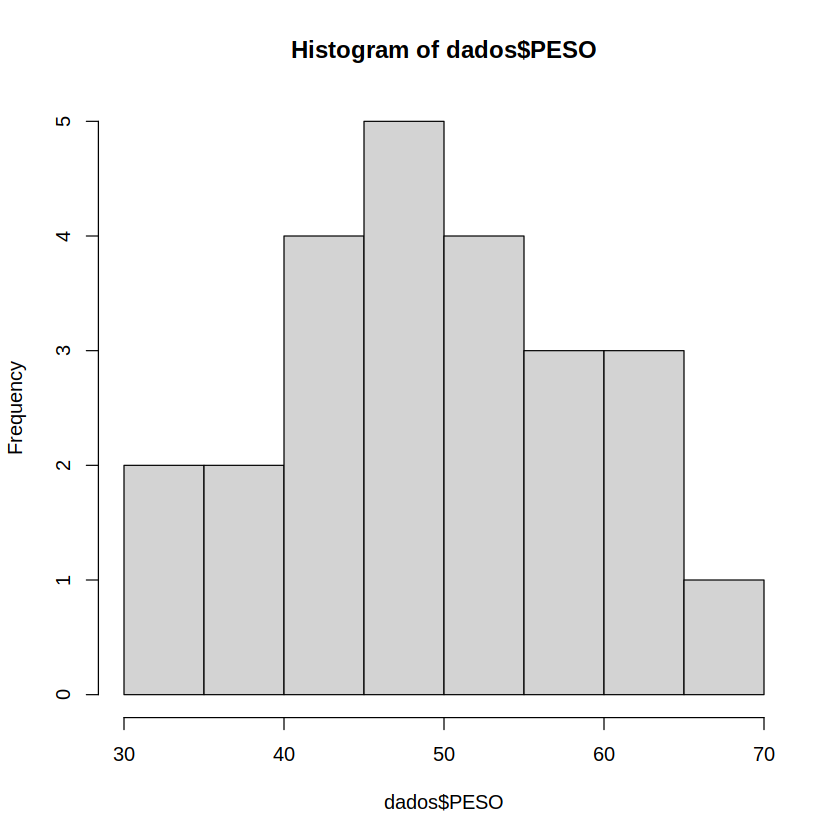

In [8]:
hist(dados$PESO)

No passo abaixo, por sua vez, está sendo exibido um gráfico de densidade, também considerando os efeitos dos tratamentos (coluna **PESO**). Perceba que estão sendo utilizadas duas funções de forma aninhada: a função **density** calcula a densidade dos dados e a **plot** transforma esse resultado em um gráfico.

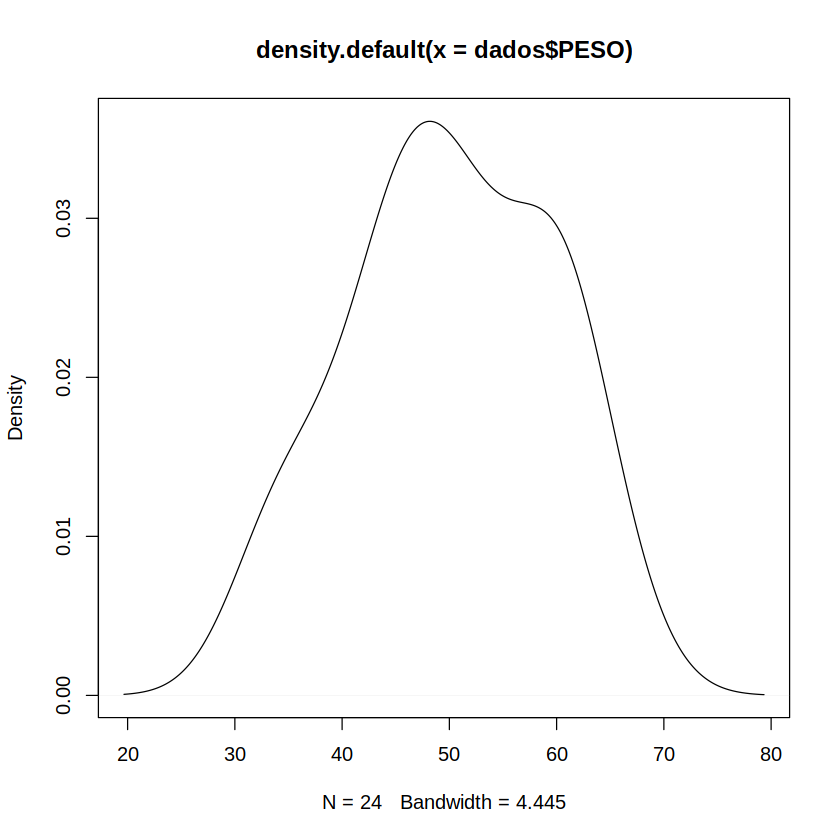

In [9]:
plot(density(dados$PESO))

## ANOVA

Hora da ANOVA! A ANOVA é um método para análise dos dados que visa decompor a variação total em fontes (causas de variação):

1. Efeitos individuais dos tratamentos
2. Efeitos de interações e aninhamento de fatores
3. Resíduo (erro experimental)

Por meio da função **aov** você pode criar um modelo que representa a ANOVA. No passo abaixo, a ANOVA foi gerada para o efeito **PESO** e tratamentos **TRAT** da variável **dados**. No passo abaixo, o resultado da função está sendo armazenado na variável **modelo** para uso posterior.

In [10]:
modelo = aov(dados$PESO~dados$TRAT)
modelo

Call:
   aov(formula = dados$PESO ~ dados$TRAT)

Terms:
                dados$TRAT Residuals
Sum of Squares    1174.125   826.500
Deg. of Freedom          3        20

Residual standard error: 6.428452
Estimated effects may be unbalanced

Para exibir o quadro da ANOVA, utilize a função **anova** passando como parâmetro o modelo criado no passo anterior. Após executar a função é possível perceber que houve diferença significativa entre os efeitos dos tratamentos. Logo, H0 foi negada!

In [11]:
anova(modelo)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
dados$TRAT,3,1174.125,391.375,9.470659,0.0004232293
Residuals,20,826.500,41.325,NA,NA


Para que a ANOVA seja válida é importante é necessário atender às pressuposições, dentre elas: 

1. Independência dos resíduos (erros nao correlacionados)
2. Normalidade residual
3. Homogeneidade da variação residual

Dessa forma, é de suma importância realizar uma inspeção dos resíduos. A função **resid** exibe a variação de cada efeito dos tratamentos do **modelo** em relação à média do tratamento.

In [12]:
residuos<-resid(modelo)
residuos

1     2     3     4     5     6     7     8     9    10    11    12    13 
  7.5  -6.5   4.5 -10.5   3.5   1.5   0.5  -4.5   6.5   1.5  -5.5   1.5   5.5 
   14    15    16    17    18    19    20    21    22    23    24 
 -6.5  -9.5  -4.5   8.5   6.5   4.0  -8.0  -7.0   7.0   1.0   3.0

A função **plot** (já utilizada anteriormente) gera gráficos a partir do **modelo** que ajudam na inspeção dos resíduos. No passo abaixo, a função **par** tem apenas o objetivo de mostrar os gráficos em uma matriz de 2 linhas por 2 colunas.

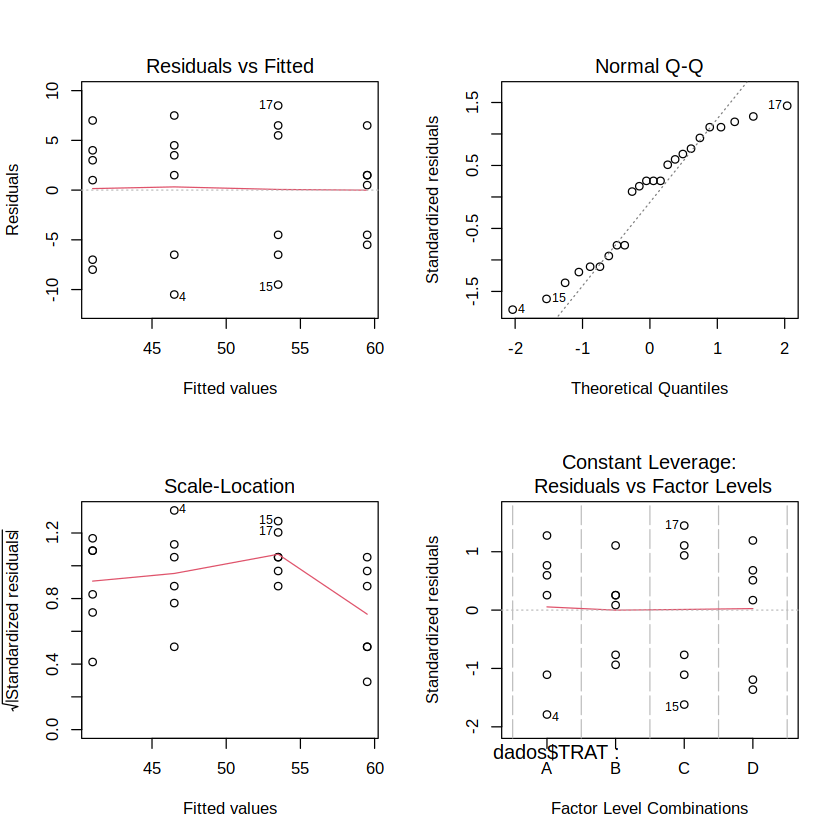

In [13]:
par(mfrow = c(2, 2))
plot(modelo)

Além dos gráficos, o pesquisador também ... No passo abaixo, a função **shapiro.test** permite avaliar a normalidade dos resíduos, que é representada pelo p-value, assim como nas avaliações de significância.

In [14]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.91888, p-value = 0.05519


De forma similar ao passo anterior, a função **barlett.test** possibilita a avaliação da homogeneidade da variância entre os tratamentos.

In [15]:
bartlett.test(residuos~dados$TRAT)


	Bartlett test of homogeneity of variances

data:  residuos by dados$TRAT
Bartlett's K-squared = 1.4621, df = 3, p-value = 0.691
